#About Dataset
link https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

The dataset contains several parameters which are considered important during the application for Masters Programs.

###Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


###Load the data

In [3]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


###Exploring tha data

In [6]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


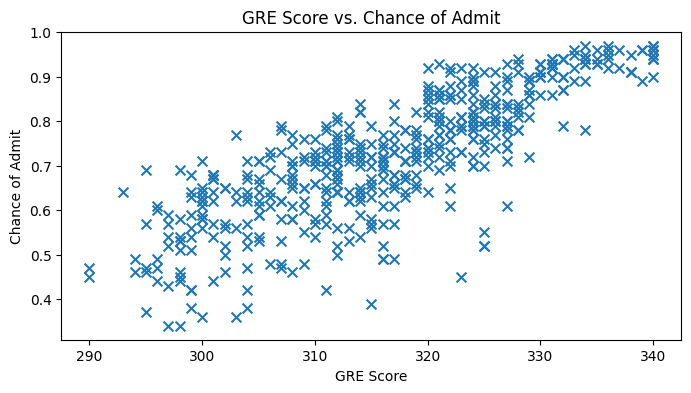

In [21]:
plt.figure(figsize=(8, 4))
plt.scatter(df['GRE Score'], df['Chance of Admit '], marker='x', s=50)
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs. Chance of Admit')
plt.show()

You can use this fuc in any data

Finds highly correlated features in a pandas DataFrame



In [11]:
def get_highly_correlated_features(df, threshold=0.8):
  """
  Finds highly correlated features in a pandas DataFrame.

  Args:
    df: The input pandas DataFrame.
    threshold: The correlation threshold. Pairs with absolute correlation
               greater than this threshold are returned.

  Returns:
    A list of tuples, where each tuple contains two feature names
    and their correlation coefficient, for pairs with correlation
    above the specified threshold.
  """
  corr_matrix = df.corr()
  highly_correlated_features = []
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname_i = corr_matrix.columns[i]
        colname_j = corr_matrix.columns[j]
        correlation = corr_matrix.iloc[i, j]
        highly_correlated_features.append((colname_j, colname_i, correlation))
  return highly_correlated_features

# Example usage:
highly_correlated_pairs = get_highly_correlated_features(df)
print("Highly correlated features (correlation > 0.8):")
for feature1, feature2, corr in highly_correlated_pairs:
    print(f"{feature1} and {feature2}: {corr:.2f}")

Highly correlated features (correlation > 0.8):
GRE Score and TOEFL Score: 0.83
GRE Score and CGPA: 0.83
TOEFL Score and CGPA: 0.81
GRE Score and Chance of Admit : 0.81
CGPA and Chance of Admit : 0.88


###Preprocessing


In [22]:
df = df.drop('TOEFL Score', axis=1)
df = df.drop('Serial No.',axis=1)
display(df.head())

,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,4,4.5,4.5,9.65,1,0.92
1,324,4,4.0,4.5,8.87,1,0.76
2,316,3,3.0,3.5,8.00,1,0.72
3,322,3,3.5,2.5,8.67,1,0.80
4,314,2,2.0,3.0,8.21,0,0.65


#Training

In [23]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']
display(X.head())
display(y.head())

,GRE Score,University Rating,SOP,LOR,CGPA,Research
0,337,4,4.5,4.5,9.65,1
1,324,4,4.0,4.5,8.87,1
2,316,3,3.0,3.5,8.00,1
3,322,3,3.5,2.5,8.67,1
4,314,2,2.0,3.0,8.21,0


,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [59]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Split data


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model


In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate model


In [62]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 0.0037
R-squared (R2) Score: 0.8186


## Check for overfitting



In [63]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Training R-squared (R2) Score: {train_r2:.4f}")
print(f"Test Mean Squared Error (MSE): {mse:.4f}")
print(f"Test R-squared (R2) Score: {r2:.4f}")

Training Mean Squared Error (MSE): 0.0036
Training R-squared (R2) Score: 0.8165
Test Mean Squared Error (MSE): 0.0037
Test R-squared (R2) Score: 0.8186


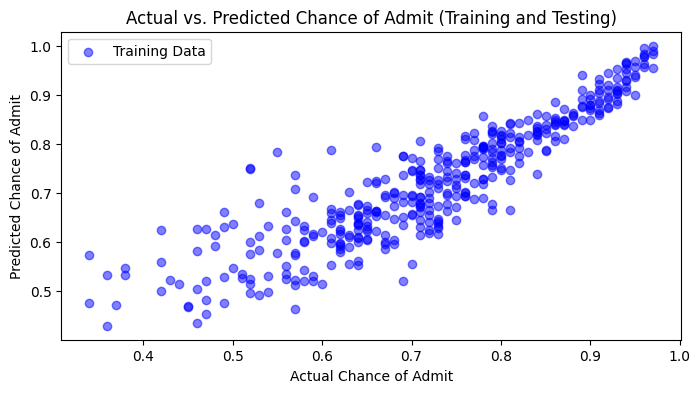

In [48]:
plt.figure(figsize=(8, 4))

# Plot training data predictions
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data', alpha=0.5)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs. Predicted Chance of Admit (Training and Testing)')
plt.legend()
plt.show()

###With PCA

In [37]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [38]:
pca  = PCA(n_components = 2) # how much componant you want in your data
pca.fit(X)


PCA(n_components=2)

In [39]:
x_pca = pca.transform(X)

In [40]:
x_pca.shape #  ((No of rows), (p1,x1))

(500, 2)

In [41]:
x_pca = pd.DataFrame(x_pca,columns= [0,1])

In [42]:
x_pca.head()

,0,1
0,20.629654,-0.196805
1,7.643393,0.722873
2,-0.510765,-0.293958
3,5.467883,-1.021960
4,-2.655041,-1.545379


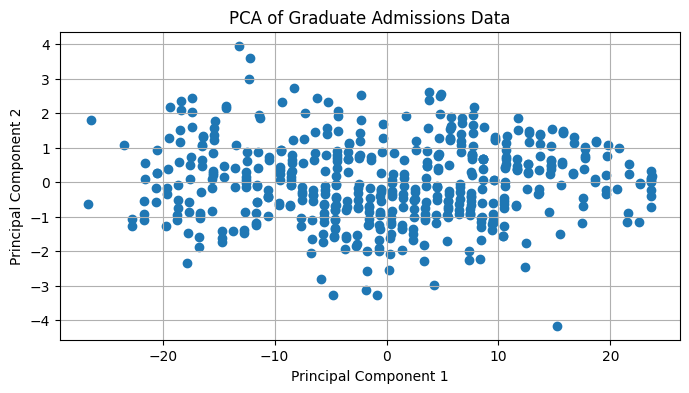

In [46]:
plt.figure(figsize=(8, 4))
plt.scatter(x_pca[0], x_pca[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Graduate Admissions Data')
plt.grid(True)
plt.show()

In [49]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Split pca data



In [55]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=42)

### Train model on pca data

In [56]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

LinearRegression()

##3 Evaluate model on pca data


In [57]:
y_pred_pca = model_pca.predict(X_test_pca)

mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

print(f"Mean Squared Error (MSE) with PCA: {mse_pca:.4f}")
print(f"R-squared (R2) Score with PCA: {r2_pca:.4f}")

Mean Squared Error (MSE) with PCA: 0.0055
R-squared (R2) Score with PCA: 0.7325


### Compare results


In [58]:
print("Performance of the model trained on the original data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")
print("\nPerformance of the model trained on the PCA-transformed data:")
print(f"Mean Squared Error (MSE) with PCA: {mse_pca:.4f}")
print(f"R-squared (R2) Score with PCA: {r2_pca:.4f}")

print("\nComparison of Model Performance:")
print("The model trained on the original data has a lower MSE and a higher R-squared score compared to the model trained on the PCA-transformed data. This indicates that the model using the original features explains more of the variance in the target variable and has lower prediction error.")

Performance of the model trained on the original data:
Mean Squared Error (MSE): 0.0037
R-squared (R2) Score: 0.8186

Performance of the model trained on the PCA-transformed data:
Mean Squared Error (MSE) with PCA: 0.0055
R-squared (R2) Score with PCA: 0.7325

Comparison of Model Performance:
The model trained on the original data has a lower MSE and a higher R-squared score compared to the model trained on the PCA-transformed data. This indicates that the model using the original features explains more of the variance in the target variable and has lower prediction error.


## Summary:

### Data Analysis Key Findings

*   The model trained on the original data achieved a Mean Squared Error (MSE) of 0.0037 and an R-squared score of 0.8186.
*   The model trained on the PCA-transformed data achieved a Mean Squared Error (MSE) of 0.0055 and an R-squared score of 0.7325.
*   The model trained on the original data performed better, exhibiting a lower MSE and a higher R-squared score compared to the model trained on the PCA-transformed data.

### Insights or Next Steps

*   In this specific case, using PCA for dimensionality reduction did not improve the Linear Regression model's performance.
*   Further analysis could explore different machine learning models or alternative dimensionality reduction techniques to see if they benefit more from PCA or other transformations.


### Choose a different model


In [64]:
from sklearn.ensemble import RandomForestRegressor

###Train the new model on original data


In [65]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluate the new model on original data


In [66]:
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Performance on Original Data:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared (R2) Score: {r2_rf:.4f}")

Random Forest Regressor Performance on Original Data:
Mean Squared Error (MSE): 0.0044
R-squared (R2) Score: 0.7842


## Train the new model on pca data

### Subtask:
Train the chosen model on the PCA-transformed data.


**Reasoning**:
Train the Random Forest Regressor model on the PCA-transformed training data.



In [67]:
rf_model.fit(X_train_pca, y_train_pca)

RandomForestRegressor(random_state=42)

### Evaluate the new model on pca data


In [68]:
y_pred_rf_pca = rf_model.predict(X_test_pca)

mse_rf_pca = mean_squared_error(y_test_pca, y_pred_rf_pca)
r2_rf_pca = r2_score(y_test_pca, y_pred_rf_pca)

print(f"Random Forest Regressor Performance on PCA Data:")
print(f"Mean Squared Error (MSE): {mse_rf_pca:.4f}")
print(f"R-squared (R2) Score: {r2_rf_pca:.4f}")

Random Forest Regressor Performance on PCA Data:
Mean Squared Error (MSE): 0.0071
R-squared (R2) Score: 0.6519


In [69]:
print("Performance Comparison of Models with and without PCA:\n")

print("Linear Regression Performance on Original Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}\n")

print("Linear Regression Performance on PCA Data:")
print(f"Mean Squared Error (MSE) with PCA: {mse_pca:.4f}")
print(f"R-squared (R2) Score with PCA: {r2_pca:.4f}\n")

print("Random Forest Regressor Performance on Original Data:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared (R2) Score: {r2_rf:.4f}\n")

print("Random Forest Regressor Performance on PCA Data:")
print(f"Mean Squared Error (MSE) with PCA: {mse_rf_pca:.4f}")
print(f"R-squared (R2) Score with PCA: {r2_rf_pca:.4f}")

Performance Comparison of Models with and without PCA:

Linear Regression Performance on Original Data:
Mean Squared Error (MSE): 0.0037
R-squared (R2) Score: 0.8186

Linear Regression Performance on PCA Data:
Mean Squared Error (MSE) with PCA: 0.0055
R-squared (R2) Score with PCA: 0.7325

Random Forest Regressor Performance on Original Data:
Mean Squared Error (MSE): 0.0044
R-squared (R2) Score: 0.7842

Random Forest Regressor Performance on PCA Data:
Mean Squared Error (MSE) with PCA: 0.0071
R-squared (R2) Score with PCA: 0.6519


## Summary:

### Data Analysis Key Findings

*   The Random Forest Regressor model on the original data achieved an MSE of 0.0044 and an R-squared of 0.7842.
*   The Random Forest Regressor model on the PCA-transformed data achieved an MSE of 0.0071 and an R-squared of 0.6519.
*   Linear Regression on the original data performed best with an MSE of 0.0037 and an R-squared of 0.8186.
*   Linear Regression on the PCA-transformed data had an MSE of 0.0055 and an R-squared of 0.7325.
*   For both Linear Regression and Random Forest Regressor, performance metrics (lower MSE and higher R-squared) were better on the original data compared to the PCA-transformed data.

### Insights or Next Steps

*   PCA negatively impacted the performance of both Linear Regression and Random Forest Regressor models on this dataset, suggesting that the removed components contained relevant information for prediction.
*   Further investigation could explore different dimensionality reduction techniques or feature selection methods to see if they improve model performance.
